In [3]:
from google.colab import files
uploaded = files.upload()

Saving Diabetes Data.xlsx to Diabetes Data.xlsx


In [4]:
import pandas as pd
import io

In [5]:
df = pd.read_excel(io.BytesIO(uploaded['Diabetes Data.xlsx']))
df.head()

,No of times Preganant,PlasmaGlucose,BP,SkinThickness,Insulin,BMI,Diabetes,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
num_obs = len(df)
num_true = len(df.loc[df['Class'] == 1])
num_false = len(df.loc[df['Class'] == 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


In [7]:
from sklearn.model_selection import train_test_split
feature_col_names = ['No of times Preganant', 'PlasmaGlucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'Diabetes', 'Age']
predicted_class_names = ['Class']
X = df[feature_col_names].values
# these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict
split_test_size = 0.3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=42)
# 42 is the set.seed() equivalent in Python which generates repeatable random distribution



In [8]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['PlasmaGlucose'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['BP'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['Diabetes'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [9]:
from sklearn.impute import SimpleImputer

fill_0= SimpleImputer(missing_values = '0', strategy = 'mean')

fill_0= SimpleImputer().fit(X[:, 1:8])




X_train = fill_0.fit_transform(X_train)

X_test = fill_0.fit_transform(X_test)



In [10]:
X_train

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [11]:
X_test

array([[6.00e+00, 9.80e+01, 5.80e+01, ..., 3.40e+01, 4.30e-01, 4.30e+01],
       [2.00e+00, 1.12e+02, 7.50e+01, ..., 3.57e+01, 1.48e-01, 2.10e+01],
       [2.00e+00, 1.08e+02, 6.40e+01, ..., 3.08e+01, 1.58e-01, 2.10e+01],
       ...,
       [0.00e+00, 1.27e+02, 8.00e+01, ..., 3.63e+01, 8.04e-01, 2.30e+01],
       [6.00e+00, 1.05e+02, 7.00e+01, ..., 3.08e+01, 1.22e-01, 3.70e+01],
       [5.00e+00, 7.70e+01, 8.20e+01, ..., 3.58e+01, 1.56e-01, 3.50e+01]])

In [12]:
# function to check 0 in column
def ColumnVal(col_name,val):
  print (col_name)
  rowcnt=0
  out_array=[]
  for t in df[col_name]:
    if(t<val):
      out_array.append(rowcnt)
      rowcnt=rowcnt+1
    return len(out_array)



#function to find mean,median,mode
def cal_mmm(col_name):
  mean = df[col_name].mean()
  mode = df[col_name].mode()
  #median = df[col_name].median
  mmm_array=[mean,mode]
  return mmm_array

In [13]:
# Zero Replacement
df['PlasmaGlucose']=df.PlasmaGlucose.mask(df.PlasmaGlucose == 0,cal_mmm("PlasmaGlucose")[0])
df['BP']=df.BP.mask(df.BP == 0,cal_mmm("BP")[0])
df['SkinThickness']=df.SkinThickness.mask(df.SkinThickness == 0,cal_mmm("SkinThickness")[0])
df['Insulin']=df.Insulin.mask(df.Insulin == 0,cal_mmm("Insulin")[0])
df['BMI']=df.BMI.mask(df.BMI == 0,cal_mmm("BMI")[0])
df['Diabetes']=df.Diabetes.mask(df.Diabetes == 0,cal_mmm("Diabetes")[0])
print (df.head())

   No of times Preganant  PlasmaGlucose    BP  ...  Diabetes  Age  Class
0                      6          148.0  72.0  ...     0.627   50      1
1                      1           85.0  66.0  ...     0.351   31      0
2                      8          183.0  64.0  ...     0.672   32      1
3                      1           89.0  66.0  ...     0.167   21      0
4                      0          137.0  40.0  ...     2.288   33      1

[5 rows x 9 columns]


outlier detection

No of times Preganant       AxesSubplot(0.125,0.657941;0.227941x0.222059)
PlasmaGlucose            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BP                       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                  AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Diabetes                       AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

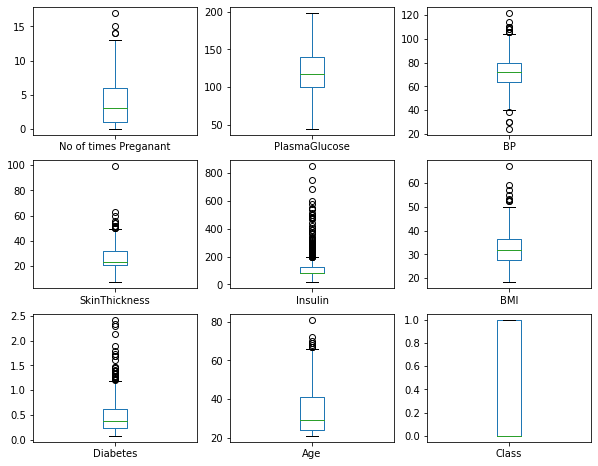

In [14]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [15]:
#outlier treatment using Z score
from scipy import stats
import numpy as np
new = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No of times Preganant  718 non-null    int64  
 1   PlasmaGlucose          718 non-null    float64
 2   BP                     718 non-null    float64
 3   SkinThickness          718 non-null    float64
 4   Insulin                718 non-null    float64
 5   BMI                    718 non-null    float64
 6   Diabetes               718 non-null    float64
 7   Age                    718 non-null    int64  
 8   Class                  718 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.1 KB


No of times Preganant       AxesSubplot(0.125,0.657941;0.227941x0.222059)
PlasmaGlucose            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BP                       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                  AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Diabetes                       AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

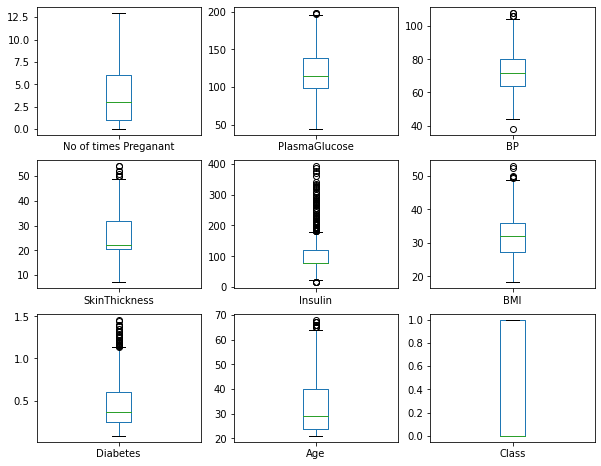

In [16]:
new.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [17]:
#Outlier removal & Visualization
filt_df = new[['SkinThickness','Insulin','Diabetes','Age','PlasmaGlucose','BMI','BP']]
low = .1
high = .9
quant_df = filt_df.quantile([low, high])
print(quant_df)



filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)

     SkinThickness  Insulin  Diabetes   Age  PlasmaGlucose   BMI    BP
0.1           17.7     66.0    0.1647  22.0           85.0  24.0  58.0
0.9           40.0    192.0    0.8468  50.0          164.0  40.6  88.0


In [18]:
new['SkinThickness']=filt_df['SkinThickness']
new['Insulin']=filt_df['Insulin']
new['BMI']=filt_df['BMI']
new['BP']=filt_df['BP']
new['Diabetes']=filt_df['Diabetes']
new['Age']=filt_df['Age']
new['PlasmaGlucose']=filt_df['PlasmaGlucose']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No of times Preganant       AxesSubplot(0.125,0.657941;0.227941x0.222059)
PlasmaGlucose            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BP                       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                  AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Diabetes                       AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

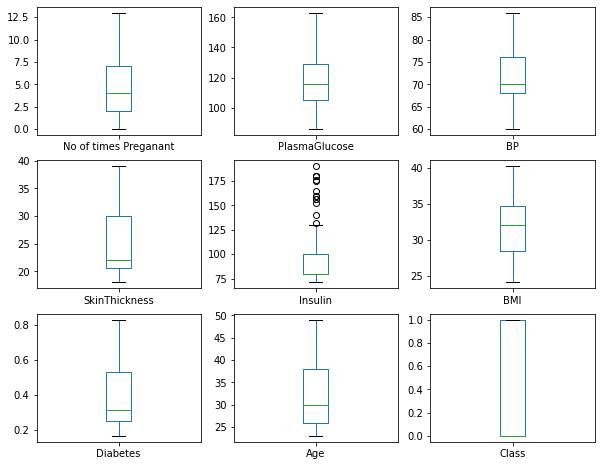

In [19]:

#final_df.dropna(axis=0, how='any',inplace=True)
new.dropna(axis=0, how='any',inplace=True)

#final_df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))
new.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))



In [20]:
# Remove column name 'A'
cleandata=new.drop(['Insulin'], axis = 1)
cleandata.head()

,No of times Preganant,PlasmaGlucose,BP,SkinThickness,BMI,Diabetes,Age,Class
5,5,116.0,74.000000,20.536458,25.6,0.201,30.0,0
15,7,100.0,69.105469,20.536458,30.0,0.484,32.0,1
17,7,107.0,74.000000,20.536458,29.6,0.254,31.0,1
19,1,115.0,70.000000,30.000000,34.6,0.529,32.0,1
23,9,119.0,80.000000,35.000000,29.0,0.263,29.0,1


No of times Preganant       AxesSubplot(0.125,0.657941;0.227941x0.222059)
PlasmaGlucose            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BP                       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness               AxesSubplot(0.125,0.391471;0.227941x0.222059)
BMI                      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Diabetes                 AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Age                            AxesSubplot(0.125,0.125;0.227941x0.222059)
Class                       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

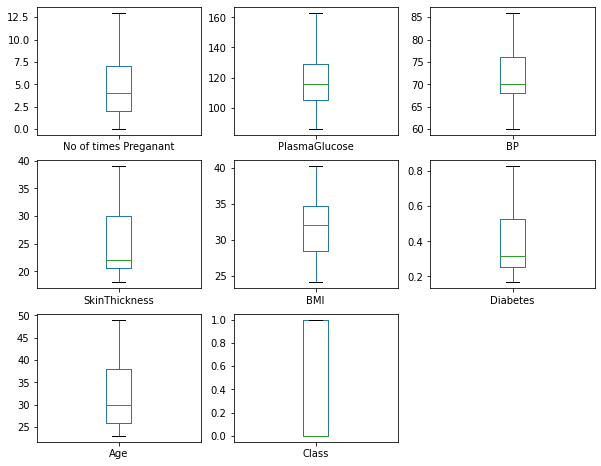

In [21]:
cleandata.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [22]:
cleandata.head()

,No of times Preganant,PlasmaGlucose,BP,SkinThickness,BMI,Diabetes,Age,Class
5,5,116.0,74.000000,20.536458,25.6,0.201,30.0,0
15,7,100.0,69.105469,20.536458,30.0,0.484,32.0,1
17,7,107.0,74.000000,20.536458,29.6,0.254,31.0,1
19,1,115.0,70.000000,30.000000,34.6,0.529,32.0,1
23,9,119.0,80.000000,35.000000,29.0,0.263,29.0,1


In [23]:
num_obs = len(cleandata)
num_true = len(cleandata.loc[cleandata['Class'] == 1])
num_false = len(cleandata.loc[cleandata['Class'] == 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases: 62 (41.61%)
Number of False cases: 87 (58.39%)


In [24]:
from sklearn.model_selection import train_test_split

feature_col_names = ['No of times Preganant', 'PlasmaGlucose', 'BP', 'SkinThickness', 'BMI', 'Diabetes', 'Age']
predicted_class_names = ['Class']

X = cleandata[feature_col_names].values # these are factors for the prediction
y = cleandata[predicted_class_names].values # this is what we want to predict

split_test_size = 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train) 

X_test = sc_x.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

In [30]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[19  5]
 [11 10]]


In [33]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6444444444444445
Precision: 0.6666666666666666
Recall: 0.47619047619047616


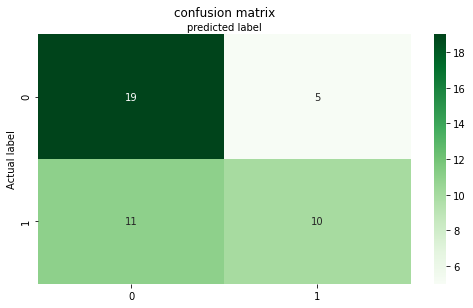

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(7,4))
sns.heatmap(cm, annot=True, cmap="Greens",fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('predicted label')
plt.show()

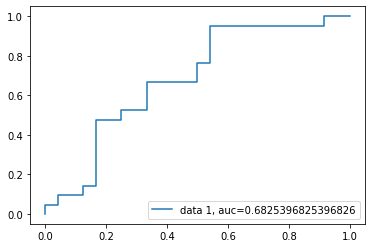

In [35]:
#ROC Curve##
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [38]:
#From Stats Module

import statsmodels.api as sm

logit_model=sm.Logit(y,X)

result=logit_model.fit()

print(result.summary2())



Optimization terminated successfully.
         Current function value: 0.586209
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.137     
Dependent Variable: y                AIC:              188.6902  
Date:               2021-07-12 14:55 BIC:              209.7178  
No. Observations:   149              Log-Likelihood:   -87.345   
Df Model:           6                LL-Null:          -101.17   
Df Residuals:       142              LLR p-value:      0.00010920
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0252      0.0681     0.3704    0.7111    -0.1082     0.1586
x2     0.0209      0.0100     2.0859    0.0370     0.0

In [45]:
feature_col_names1 = ['No of times Preganant', 'PlasmaGlucose', 'BP','Age']
predicted_class_names = ['Class']

X = cleandata[feature_col_names1].values # these are factors for the prediction
y = cleandata[predicted_class_names].values # this is what we want to predict


In [46]:
import statsmodels.api as sm

logit_model1=sm.Logit(y,X)

result=logit_model1.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.587439
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.135     
Dependent Variable: y                AIC:              183.0569  
Date:               2021-07-12 15:01 BIC:              195.0727  
No. Observations:   149              Log-Likelihood:   -87.528   
Df Model:           3                LL-Null:          -101.17   
Df Residuals:       145              LLR p-value:      5.1270e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0194      0.0659     0.2947    0.7682    -0.1097     0.1485
x2     0.0214      0.0099     2.1636    0.0305     0.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
from pydot import graph_from_dot_data

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt.predict(X_train)

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_train, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [ ]:
feature_cols = ['No of times Preganant', 'Plasma', 'BP','Insulin', 'SkinThickness', 'BMI', 'Diabetes', 'Age']

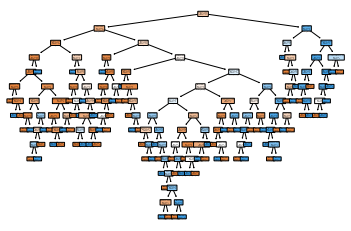

In [ ]:
from sklearn.tree import plot_tree
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dt, feature_names = feature_cols, filled = True , precision = 4, rounded = True,)